In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('C:\\Users\\HP\\Project\\data\\combined_csv.csv')

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data = df[(df['Age_Code']=='Year')&(df['Age']>=18)]
len(data)

1216655

In [4]:
#Drop rows in which HB is null
data = data.dropna(subset=['Haemoglobin_level'],axis=0)


In [5]:
#Drop Columns of 3 years and 5 years
cols_under5 = ['illness_type','illness_duration', 'treatment_type']
cols_under3 = ['first_breast_feeding', 'is_cur_breast_feeding',
       'day_or_mn_for_breast_feeding_cd', 'day_or_month_for_breast_feeding',
       'water_month', 'ani_milk_month', 'semisolid_month_or_day',
       'solid_month', 'vegetables_month_or_day']
data = data.drop(cols_under5, axis = 1)
data = data.drop(cols_under3, axis = 1)

In [6]:
# Drop unwanted variables
data = data.drop(['PSU_ID', 'ahs_house_unit', 'house_hold_no','date_survey', 'record_code_iodine_reason', 'sl_no', 'usual_residance', 'usual_residance_Reason', 'identification_code','Age_Code','date_of_birth', 'month_of_birth', 'year_of_birth','Weight_measured','Length_height_measured',
       'length_height_code','Haemoglobin_test','Haemoglobin','Diabetes_test', 'fasting_blood_glucose'], axis = 1)

In [ ]:
# Mapping the labels non numeric to numeric

In [7]:

data['Sex'] = data['Sex'].map({'Male': 1, 'Female': 2})

In [8]:
data['state_code'] = data['state_code'].astype('category')
# Assigning numerical values and storing in another column
data['state_code'] = data['state_code'].cat.codes

In [9]:
data['rural_urban'] = data['rural_urban'].astype('category')
# Assigning numerical values and storing in another column
data['rural_urban'] = data['rural_urban'].cat.codes


In [10]:
data['district_code'] = data['district_code'].astype('category')
# Assigning numerical values and storing in another column
data['district_code'] = data['district_code'].cat.codes


In [11]:
data['stratum'] = data['stratum'].astype('category')
# Assigning numerical values and storing in another column
data['stratum'] = data['stratum'].cat.codes

In [12]:
data['record_code_iodine'] = data['record_code_iodine'].astype('category')
# Assigning numerical values and storing in another column
data['record_code_iodine'] = data['record_code_iodine'].cat.codes

In [13]:
data['Marital_status'].value_counts()

Married and Gauna perfomed         225841
Never married                       51874
Married but Gauna not performed      6092
Widow                                4279
Separated                             782
Not Stated                            755
Divorced                              364
Remarried                             240
Name: Marital_status, dtype: int64

In [14]:
data['Marital_status'] = data['Marital_status'].map({'Married and Gauna perfomed': 1, 'Never married': 2,'Married but Gauna not performed':3,'Widow':4,
                                                    'Separated':5,'Divorced':6,'Remarried':7,'Not Stated':8,'NaN':-1})

In [15]:
data['Marital_status'] = data['Marital_status'].where(~(data['Marital_status']==8.0), other = np.nan)

In [ ]:
# Plot the weight and height in which they are not null 

In [17]:
from matplotlib import pyplot as plt # plotting
from math import *

<function matplotlib.pyplot.show(*args, **kw)>

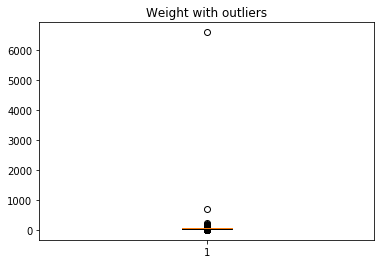

In [18]:
plt.boxplot(data['Weight_in_kg'].dropna())
plt.title('Weight with outliers')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

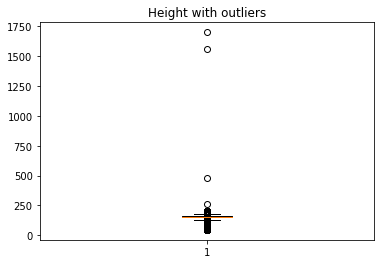

In [19]:
plt.boxplot(data['Length_height_cm'].dropna())
plt.title('Height with outliers')
plt.show

In [ ]:
# Remove outliers for height and weight

In [20]:
def remove_outliers(data, feature):
    stdev = sqrt(np.var(data[feature].dropna()))
    median = np.median(data[feature].dropna())
    print("number of discarded measurements")
    display(len(data[[feature]].where(abs(data[feature] - median)>(3*stdev)).dropna()))
# keep original values if difference from mean is less than 3 standard deviations. NA otherwise
    return data[[feature]].where(abs(data[feature] - median)<(3*stdev), other = np.nan)

In [21]:
data['Length_height_cm'] = remove_outliers(data, 'Length_height_cm')

number of discarded measurements


2597

In [22]:
print('number of discarded measurements')
display(len(data[data['Weight_in_kg']<20]))
data['Weight_in_kg'] = data['Weight_in_kg'].where(data['Weight_in_kg']>20, other=np.nan)

number of discarded measurements


871

<function matplotlib.pyplot.show(*args, **kw)>

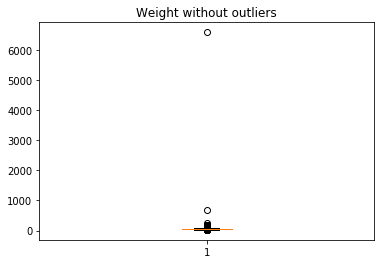

In [23]:
plt.boxplot(data['Weight_in_kg'].dropna())
plt.title('Weight without outliers')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

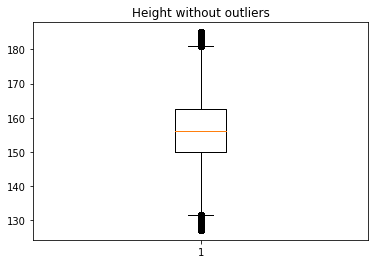

In [24]:
plt.boxplot(data['Length_height_cm'].dropna())
plt.title('Height without outliers')
plt.show

In [ ]:
# Calculate body mass index for male and female age above 18

In [25]:
data['bmi'] = data['Weight_in_kg']/(data['Length_height_cm']/100)**2

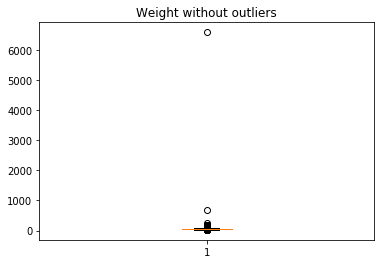

In [26]:
plt.boxplot(data['Weight_in_kg'].dropna())
plt.title('Weight without outliers')
plt.show()

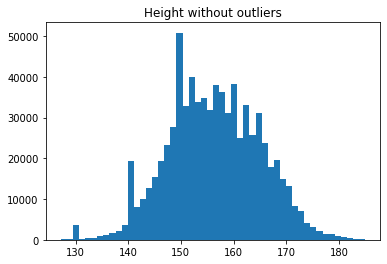

In [27]:
plt.hist(data['Length_height_cm'].dropna(), bins = 50)
plt.title('Height without outliers')
plt.show()


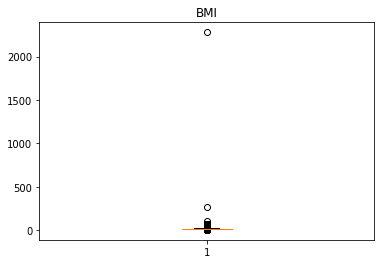

In [28]:
plt.boxplot(data['bmi'].dropna())
plt.title('BMI')
plt.show()

In [ ]:
# Remove outliers for BP Systolic, BP Diastolic And Pulse Rate 

In [29]:
def remove_outliers_difference(data, col1, col2):
    stdev = sqrt((data[col1] - data[col2]).var())
# how many measurements were excluded
    print('number of discarded measurements')
    display(len(data[[col1, col2]].where(abs(data[col1] - data[col2])>(3*stdev)).dropna()))
# keep original values if difference of two measurements is less than 3 standard deviations. NA otherwise
    return data[[col1, col2]].where(abs(data[col1] - data[col2])<(3*stdev), other = np.nan)

In [30]:
data[['BP_systolic', 'BP_systolic_2_reading']] = remove_outliers_difference(data, 'BP_systolic', 'BP_systolic_2_reading')
data[['BP_Diastolic', 'BP_Diastolic_2reading']] = remove_outliers_difference(data, 'BP_Diastolic', 'BP_Diastolic_2reading')
data[['Pulse_rate', 'Pulse_rate_2_reading']] = remove_outliers_difference(data, 'Pulse_rate', 'Pulse_rate_2_reading')

number of discarded measurements


10498

number of discarded measurements


13161

number of discarded measurements


12254

In [ ]:
# function for aggregate_reading of BP_systolic,BP_Diastolic and Pulse_rate

In [31]:
def aggregate_readings(data, col1, col2):
    data[col1] = data.apply(lambda row: sum([row[col1], row[col2]])/2, axis = 1)
    data = data.drop(col2, axis = 1)
    return data

In [32]:
data = aggregate_readings(data, 'BP_systolic', 'BP_systolic_2_reading')
data = aggregate_readings(data, 'BP_Diastolic', 'BP_Diastolic_2reading')
data = aggregate_readings(data, 'Pulse_rate', 'Pulse_rate_2_reading')

In [33]:
data[['BP_Diastolic', 'BP_systolic']] = data[['BP_Diastolic', 'BP_systolic']].where(data.BP_Diastolic < data.BP_systolic, other = np.nan)

In [ ]:
#Plot Histogram for HB & fasting_blood_glucose

<function matplotlib.pyplot.show(*args, **kw)>

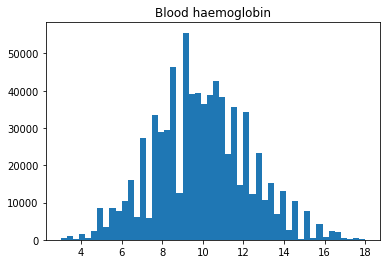

In [34]:
plt.hist(data['Haemoglobin_level'], bins = 50)
plt.title('Blood haemoglobin')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

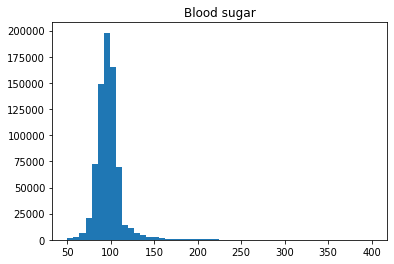

In [35]:
plt.hist(data.fasting_blood_glucose_mg_dl[~np.isnan(data.fasting_blood_glucose_mg_dl)], bins=50)
plt.title('Blood sugar')
plt.show

In [ ]:
#Remove Outliers for fasting_blood_glucose

In [36]:
data['fasting_blood_glucose_mg_dl'] = remove_outliers(data,'fasting_blood_glucose_mg_dl')

number of discarded measurements


10931

In [ ]:
#Plot boxplot for duration_pregnancy where months are not null

<function matplotlib.pyplot.show(*args, **kw)>

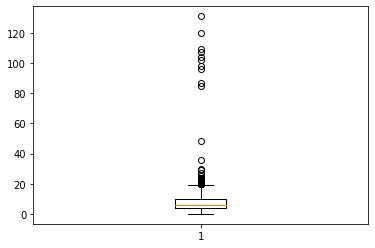

In [37]:
plt.boxplot(data['duration_pregnanacy'].dropna())
plt.show

In [ ]:
# Correlation Biomarkers with all other variables

In [38]:
corr=data.corr()[['Haemoglobin_level', 'Pulse_rate', 'BP_Diastolic', 'BP_systolic', 'fasting_blood_glucose_mg_dl']]
corr.where(abs(corr)>0.1)

,Haemoglobin_level,Pulse_rate,BP_Diastolic,BP_systolic,fasting_blood_glucose_mg_dl
state_code,NaN,NaN,NaN,NaN,NaN
district_code,NaN,NaN,NaN,NaN,NaN
rural_urban,NaN,NaN,NaN,NaN,NaN
stratum,NaN,NaN,NaN,NaN,NaN
test_salt_iodine,NaN,NaN,NaN,NaN,NaN
record_code_iodine,NaN,NaN,NaN,NaN,NaN
Sex,-0.169308,0.151439,NaN,NaN,NaN
Age,NaN,NaN,0.185795,0.329158,0.188794
Weight_in_kg,0.109813,NaN,0.210746,0.169638,NaN
Length_height_cm,0.169482,NaN,NaN,NaN,NaN


In [ ]:
#Drop the columns where not coorelation between the variables and biomarkers

In [39]:
data_correlated = data.drop(['state_code','district_code','rural_urban', 'stratum', 'test_salt_iodine', 'record_code_iodine', 'duration_pregnanacy'], axis = 1)
corr = data_correlated.corr()[['Haemoglobin_level', 'Pulse_rate', 'BP_Diastolic', 'BP_systolic', 'fasting_blood_glucose_mg_dl']]
corr.where(abs(corr)>0.1)

,Haemoglobin_level,Pulse_rate,BP_Diastolic,BP_systolic,fasting_blood_glucose_mg_dl
Sex,-0.169308,0.151439,NaN,NaN,NaN
Age,NaN,NaN,0.185795,0.329158,0.188794
Weight_in_kg,0.109813,NaN,0.210746,0.169638,NaN
Length_height_cm,0.169482,NaN,NaN,NaN,NaN
Haemoglobin_level,1.000000,NaN,NaN,NaN,NaN
BP_systolic,NaN,NaN,0.689020,1.000000,0.144944
BP_Diastolic,NaN,0.202858,1.000000,0.689020,0.106357
Pulse_rate,NaN,1.000000,0.202858,NaN,NaN
fasting_blood_glucose_mg_dl,NaN,NaN,0.106357,0.144944,1.000000
Marital_status,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Create a Anemia_dataframe 

In [40]:
data_anemia = data[["stratum","test_salt_iodine","record_code_iodine","Sex","Age","Weight_in_kg","Length_height_cm","Haemoglobin_level","BP_systolic","BP_Diastolic","Pulse_rate",\
                    "fasting_blood_glucose_mg_dl","Marital_status",'gauna_perfor_not_perfor',"duration_pregnanacy","bmi"]]
data_anemia.head()

,stratum,test_salt_iodine,record_code_iodine,Sex,Age,Weight_in_kg,Length_height_cm,Haemoglobin_level,BP_systolic,BP_Diastolic,Pulse_rate,fasting_blood_glucose_mg_dl,Marital_status,gauna_perfor_not_perfor,duration_pregnanacy,bmi
0,2,7,0,2,37.0,48.099998,147.89999,8.0,125.5,67.0,75.0,89.0,1.0,3.0,NaN,21.989167
7,2,7,0,2,47.0,49.200001,147.70000,10.5,133.0,91.0,97.0,91.0,1.0,3.0,NaN,22.552990
10,2,7,0,1,33.0,53.599998,164.10001,8.0,126.5,89.0,75.0,90.0,NaN,NaN,NaN,19.904330
11,2,7,0,2,25.0,47.000000,147.80000,11.0,116.5,67.5,94.5,96.0,1.0,2.0,7.0,21.515378
19,2,7,0,1,45.0,49.500000,160.70000,12.5,142.5,81.5,87.0,85.0,NaN,NaN,NaN,19.167852


In [41]:
data_anemia.describe(include='all')

,stratum,test_salt_iodine,record_code_iodine,Sex,Age,Weight_in_kg,Length_height_cm,Haemoglobin_level,BP_systolic,BP_Diastolic,Pulse_rate,fasting_blood_glucose_mg_dl,Marital_status,gauna_perfor_not_perfor,duration_pregnanacy,bmi
count,762973.000000,762973.000000,762973.000000,762973.000000,762973.000000,754274.000000,751726.000000,762973.000000,730159.000000,730159.000000,739014.000000,727724.000000,289472.000000,225144.000000,41008.000000,750828.000000
mean,1.100703,22.625305,0.885519,1.538913,40.374570,50.994421,156.266167,9.920145,122.549664,78.101012,80.284438,95.813546,1.287707,2.743911,8.072157,20.842146
std,0.897209,10.005129,0.418985,0.498484,16.175496,12.529271,8.727641,2.345420,18.661753,12.853239,11.590851,12.055257,0.646650,0.573320,5.916971,4.350439
min,0.000000,0.000000,0.000000,1.000000,18.000000,20.100000,127.200000,3.000000,60.000000,40.000000,40.000000,50.000000,1.000000,1.000000,0.000000,6.509600
25%,0.000000,15.000000,1.000000,1.000000,27.000000,44.299999,150.100010,8.400000,110.500000,70.000000,72.000000,89.000000,1.000000,3.000000,4.000000,18.572724
50%,1.000000,30.000000,1.000000,2.000000,38.000000,50.200001,156.100010,9.800000,121.000000,78.000000,79.500000,96.000000,1.000000,3.000000,6.000000,20.576062
75%,2.000000,30.000000,1.000000,2.000000,51.000000,56.400002,162.500000,11.500000,132.500000,85.500000,87.500000,102.000000,1.000000,3.000000,10.000000,22.597083
max,2.000000,67.000000,2.000000,2.000000,100.000000,6602.000000,185.000000,18.000000,249.500000,160.000000,140.000000,154.000000,7.000000,3.000000,131.000000,2279.063409


In [ ]:
# Create a new column anemia where for Male_HB is less than 13 and for female_HB is less than 12
# In Anemia Column: 1 indicates Anemia and 0 indicates no Anemia

In [42]:
data_anemia['anemia'] = np.where(((data_anemia['Sex'] == 1) & (data_anemia['Haemoglobin_level'] < 13.0)) | ((data_anemia['Sex'] == 2) & (data_anemia['Haemoglobin_level'] < 12.0)), 1, 0)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
data_anemia[['Sex','Haemoglobin_level','anemia']]

,Sex,Haemoglobin_level,anemia
0,2,8.0,1
7,2,10.5,1
10,1,8.0,1
11,2,11.0,1
19,1,12.5,1
...,...,...,...
1889308,1,11.2,1
1889309,2,5.6,1
1889314,2,10.2,1
1889315,2,9.6,1


In [45]:
data_anemia['anemia'].value_counts()

1    655418
0    107555
Name: anemia, dtype: int64

In [ ]:
#Drop HB_level Column

In [46]:
data_anemia = data_anemia.drop('Haemoglobin_level', axis = 1)

In [ ]:
#Remove null values using Simple_Imputer

In [47]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
data_anemia_imputed = pd.DataFrame(imputer.fit_transform(data_anemia))
data_anemia_imputed.columns = data_anemia.columns
data_anemia_imputed.index = data_anemia.index
data_anemia = data_anemia_imputed

In [48]:
data_anemia.head()

,stratum,test_salt_iodine,record_code_iodine,Sex,Age,Weight_in_kg,Length_height_cm,BP_systolic,BP_Diastolic,Pulse_rate,fasting_blood_glucose_mg_dl,Marital_status,gauna_perfor_not_perfor,duration_pregnanacy,bmi,anemia
0,2.0,7.0,0.0,2.0,37.0,48.099998,147.89999,125.5,67.0,75.0,89.0,1.000000,3.000000,8.072157,21.989167,1.0
7,2.0,7.0,0.0,2.0,47.0,49.200001,147.70000,133.0,91.0,97.0,91.0,1.000000,3.000000,8.072157,22.552990,1.0
10,2.0,7.0,0.0,1.0,33.0,53.599998,164.10001,126.5,89.0,75.0,90.0,1.287707,2.743911,8.072157,19.904330,1.0
11,2.0,7.0,0.0,2.0,25.0,47.000000,147.80000,116.5,67.5,94.5,96.0,1.000000,2.000000,7.000000,21.515378,1.0
19,2.0,7.0,0.0,1.0,45.0,49.500000,160.70000,142.5,81.5,87.0,85.0,1.287707,2.743911,8.072157,19.167852,1.0


In [ ]:
#Split the Dataframe into training and test set and test set size is 20%

In [49]:
from sklearn.model_selection import train_test_split

X = data_anemia
y = data_anemia.anemia

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [50]:
X_train.groupby('anemia')['anemia'].count()

anemia
0.0     85887
1.0    524491
Name: anemia, dtype: int64

In [51]:
y_train = X_train.pop('anemia')
y_test = X_test.pop('anemia')

In [ ]:
#Apply Random Forest classifier and find accuracy

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0).fit(X_train, y_train)

In [54]:
y_pred = rf.predict(X_test)
confusion_matrix_result = confusion_matrix(y_test.values, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix_result)

Confusion matrix:
[[     0  21668]
 [     0 130927]]


In [55]:
from sklearn.metrics import  classification_report, accuracy_score

print(classification_report(y_test, y_pred))

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     21668
         1.0       0.86      1.00      0.92    130927

    accuracy                           0.86    152595
   macro avg       0.43      0.50      0.46    152595
weighted avg       0.74      0.86      0.79    152595



In [ ]:
# Accuracy of Random Forest classifier

In [56]:
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

Accuracy: 0.86


In [ ]:
#Apply Logistic_Regression model

In [57]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
y_pred=logreg.predict(X_test)

In [60]:
from sklearn import metrics
%matplotlib inline
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[     0,  21668],
       [     7, 130920]], dtype=int64)

In [ ]:
#Calculate Accuracy for Logistic_Regression model

In [61]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8579573380517055
